# Parte A

## Sample distribution and sampling distribution

Importando bibliotecas que serão usadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, gamma

Sample distribution and sampling distribution

Definindo valores com base no que foi calculado na primeira parte do trabalho

In [2]:
real_mean = 11.42
real_std = 1.26
n_sample = 50

Criando população aritifical

In [3]:
n_population = 100000
population = np.random.normal(loc=real_mean,
                              scale=real_std,
                              size=n_population)

Criando amostra (sample distribution)

In [4]:
sample = np.random.choice(population,
                          size=n_sample,
                          replace=False)

Criando distribuição das médias (sampling distribution)

In [5]:
n_repeticoes = 2000
sampling_means = []

for _ in range(n_repeticoes):
  temp_sample = np.random.choice(population,
                                 size=n_sample,
                                 replace=False)
  sampling_means.append(np.mean(temp_sample))

### Plotando histogramas

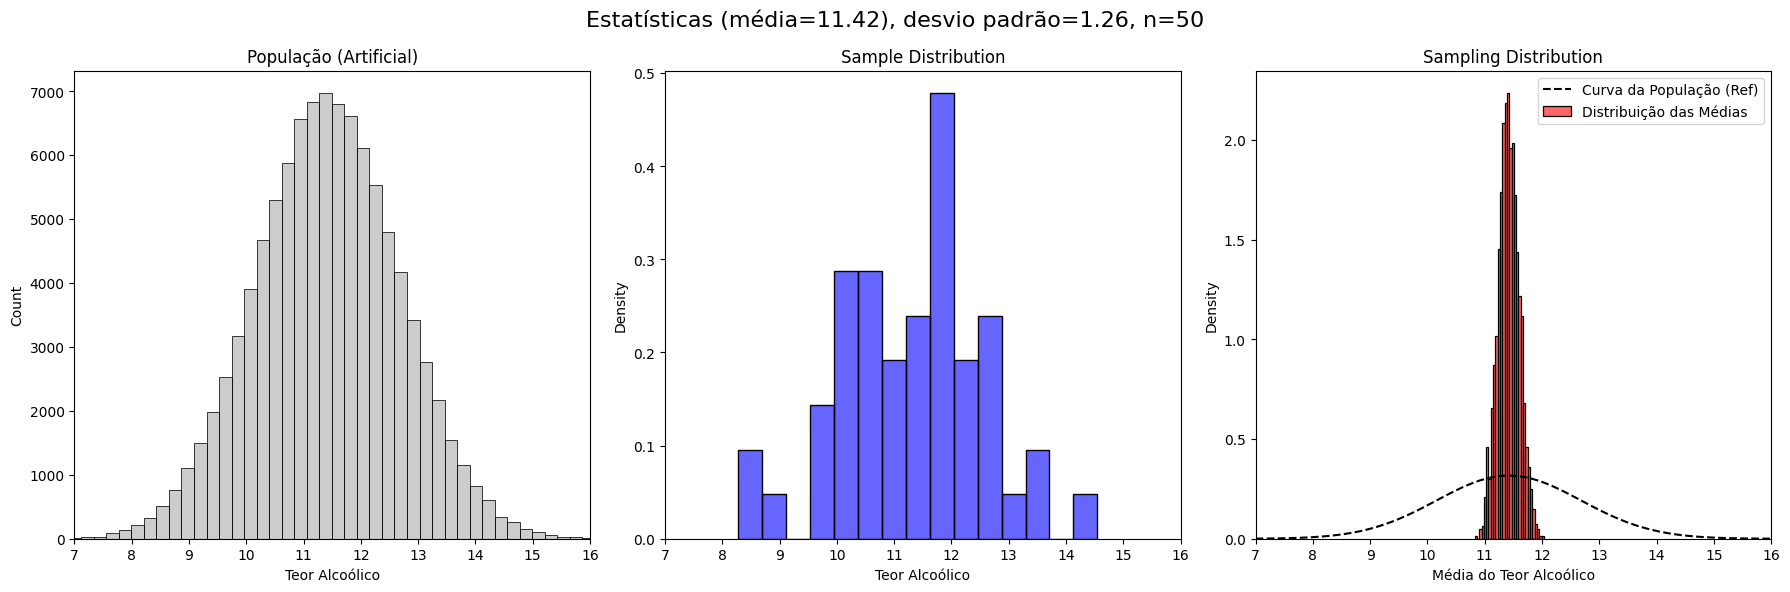

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(18,6))
fig.suptitle(f'Estatísticas (média={real_mean}), desvio padrão={real_std}, n={n_sample}', fontsize=16)

# PLOT POPULAÇÃO ARTIFICIAL
sns.histplot(population, bins=50, color='gray', alpha=0.4, ax=axes[0])
axes[0].set_title('População (Artificial)')
axes[0].set_xlabel('Teor Alcoólico')
axes[0].set_xlim(7, 16)

# PLOT AMOSTRA - SAMPLE DISTRIBUTION
sns.histplot(sample, stat='density', bins=15, color='blue', alpha=0.6, ax=axes[1])
axes[1].set_title(f'Sample Distribution')
axes[1].set_xlabel('Teor Alcoólico')
axes[1].set_xlim(7, 16)

# PLOT DISTRIBUIÇÃO DAS MÉDIAS - SAMPLING DISTRIBUTION
sns.histplot(sampling_means, stat='density', bins=30, color='red', alpha=0.6, ax=axes[2], label='Distribuição das Médias')
x = np.linspace(7, 16, 100)
axes[2].plot(x, norm.pdf(x, real_mean, real_std), 'k--', label='Curva da População (Ref)')
axes[2].set_title('Sampling Distribution')
axes[2].set_xlabel('Média do Teor Alcoólico')
axes[2].set_xlim(7, 16)
axes[2].legend()

# plotando gráfico
plt.tight_layout()
plt.show()

### Avaliação da probabilidade

Definindo limite

In [7]:
limite = 11.0

Caso 1: probabilidade para a população

In [8]:
# fórmula:  Z = (x - media) - desvio padrao
z_population = (limite-real_mean) / real_std
prob_population = norm.cdf(z_population)

Caso 2: probabilidade para sampling distribution

In [9]:
erro_padrao = real_std / np.sqrt(n_sample)
z_sampling = (limite - real_mean) / erro_padrao
prob_sampling = norm.cdf(z_sampling)

Imprimindo resultados dos casos acima

In [10]:
resultados = pd.DataFrame({
    "Evento (Menor que 11%)": ["Uma Garrafa Individual", f"Média de uma Caixa (n={n_sample})"],
    "Desvio Usado": [f"Sigma = {real_std}", f"SE = {erro_padrao:.2f}"],
    "Z-Score": [f"{z_population:.2f}", f"{z_sampling:.2f}"],
    "Probabilidade": [f"{prob_population:.4f} ({prob_population*100:.2f}%)", f"{prob_sampling:.4f} ({prob_sampling*100:.4f}%)"]
})

print("\n--- AVALIAÇÃO DE PROBABILIDADE ---")
print(resultados.to_markdown(index=False))


--- AVALIAÇÃO DE PROBABILIDADE ---
| Evento (Menor que 11%)    | Desvio Usado   |   Z-Score | Probabilidade    |
|:--------------------------|:---------------|----------:|:-----------------|
| Uma Garrafa Individual    | Sigma = 1.26   |     -0.33 | 0.3694 (36.94%)  |
| Média de uma Caixa (n=50) | SE = 0.18      |     -2.36 | 0.0092 (0.9211%) |


# Parte B

## Teorema do Limite Central (TCL)

O Teorema do Limite Central diz que: não importa como seja a distribuição original dos dados, a distribuição das **médias das amostras** será um **normal**, desde que o tamanho de amostras seja grande o suficiente

**Enunciado da tarefa da parte B:** Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.

Configurando população - distribuição Gama

In [11]:
shape_gama = 2.0
scale_gama = 2.0

Gerando estatísticas da população Gama

In [12]:
population_mean = shape_gama * scale_gama               # Média = k * theta
population_std = np.sqrt(shape_gama * (scale_gama**2))

Gerando população inteira

In [13]:
populacao_gama = np.random.gamma(shape_gama, scale_gama, 100000)

### Experimento TCL

Configurando tamanhos de amostras e quantidade de simulações

In [14]:
sample_size = [10, 30, 50, 100]
n_simulations = 1000

### Plotando histograma

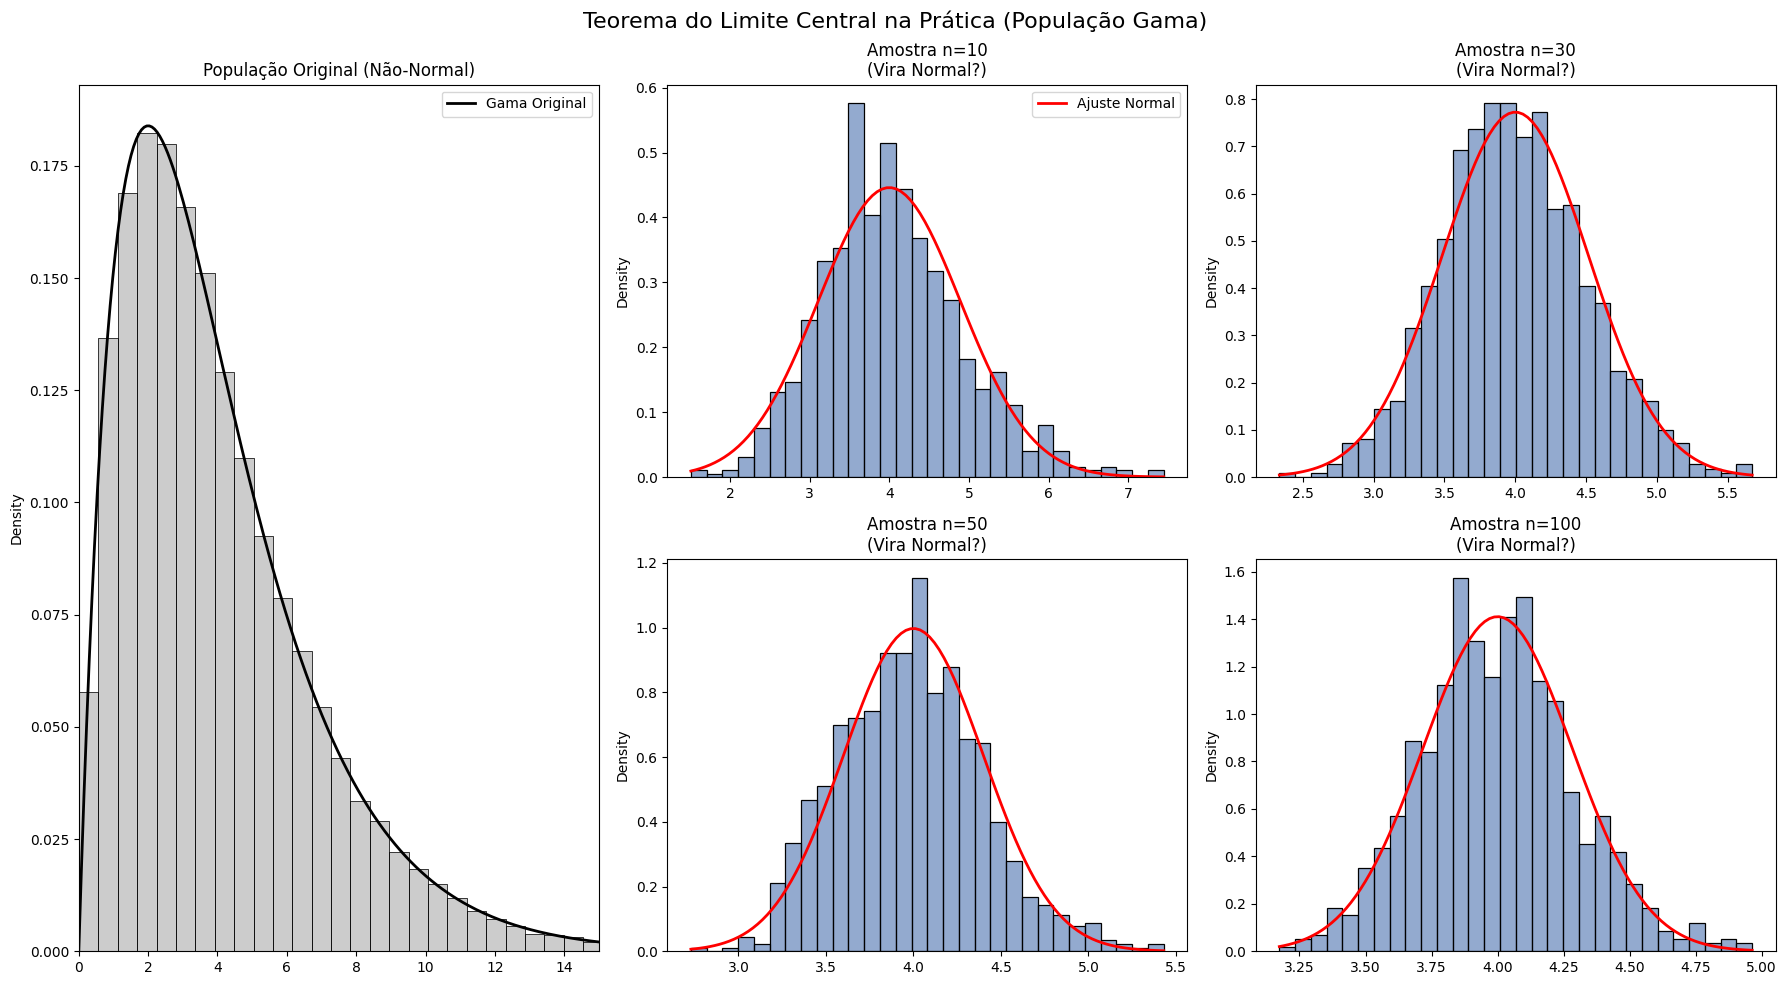

In [ ]:
fig = plt.figure(figsize=(16, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# plotando população original
ax_pop = plt.subplot2grid((2, 4), (0, 0), colspan=2)
sns.histplot(populacao_gama, stat='density', bins=50, color='gray', alpha=0.5, ax=ax_pop)
ax_pop.set_title(f'1. População Original (Gama)\n(Assimétrica/Torta)')
ax_pop.set_xlim(0, 15)

# desenhando linha teórica da Gama
x = np.linspace(0, 15, 200)
y = gamma.pdf(x, shape_gama, scale=scale_gama)
ax_pop.plot(x, y, 'k-', linewidth=2, label='Curva Gama')
ax_pop.legend()

# loop para percorrer os tamanhos de amostra definidos em 'sample_size'

# posições do grid no gráfico
posicoes_grid = [(0, 2), (0, 3), (1, 2), (1, 3)]

for i, n in enumerate(sample_size):
    # coletando 1000 médias para esse tamanho n
    medias = []
    for _ in range(n_simulations):
        amostra = np.random.choice(populacao_gama, size=n)
        medias.append(np.mean(amostra))
    
    # calculando erro padrão
    erro_padrao = population_std / np.sqrt(n)
    
    # plotando
    # ax = plt.subplot2grid((2, 4), posicoes_grid[i][0], colspan=1) if i > 1 else plt.subplot2grid((2, 4), posicoes_grid[i], colspan=1)
    
    ax = plt.subplot2grid((2, 4), posicoes_grid[i], colspan=1)
    
    # ignorando complexidade do subplot2grid e corrigindo layout
    if i == 0: ax = plt.subplot2grid((2, 4), (0, 2))
    if i == 1: ax = plt.subplot2grid((2, 4), (0, 3))
    if i == 2: ax = plt.subplot2grid((2, 4), (1, 0), colspan=2) 
    if i == 3: ax = plt.subplot2grid((2, 4), (1, 2), colspan=2) 
    
plt.close() 

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(f'Teorema do Limite Central na Prática (População Gama)', fontsize=16)

gs = axes[0, 0].get_gridspec()
for ax in axes[:, 0]: ax.remove() 
axbig = fig.add_subplot(gs[:, 0]) 
sns.histplot(populacao_gama, stat='density', bins=50, color='gray', alpha=0.4, ax=axbig)
axbig.plot(x, gamma.pdf(x, shape_gama, scale=scale_gama), 'k-', lw=2, label='Gama Original')
axbig.set_title('População Original (Não-Normal)')
axbig.set_xlim(0, 15)
axbig.legend()

coords = [(0, 1), (0, 2), (1, 1), (1, 2)] 

for i, n in enumerate(sample_size):
    medias = [np.mean(np.random.choice(populacao_gama, n)) for _ in range(n_simulations)]
    
    # Plotar Histograma
    r, c = coords[i]
    ax = axes[r, c]
    sns.histplot(medias, stat='density', bins=30, color='#4c72b0', alpha=0.6, ax=ax)
    
    # Plotar a Curva Normal Teórica
    # O desvio deve ser o Erro Padrão (sigma / raiz(n))
    erro_padrao = population_std / np.sqrt(n)
    x_norm = np.linspace(min(medias), max(medias), 100)
    y_norm = norm.pdf(x_norm, population_mean, erro_padrao)
    
    ax.plot(x_norm, y_norm, 'r-', lw=2, label='Ajuste Normal')
    ax.set_title(f'Amostra n={n}\n(Vira Normal?)')
    if i == 0: ax.legend() 

plt.tight_layout()
plt.show()

# Parte C

## P-value

**Enunciado da tarefa da parte C**: Faça um programa que mostra o passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo.


**Contexto do experimento:**

Assumindo que um lote de vinhos é "bom" (premium), foi encontrado uma garrafa com 9.0% de teor alcoólico. Então, qual a probabilidade de um vinho premium ter um teor alcoólico tão baixo **por acaso**? Onde:

* Tal probabilidade é o p-value
* Se o p-value for menor que 0.05, então pode-se concluir que essa garrafa provavelmente **não é premium**, rejeitando a hipótese nula (H0)

Definindo dados

In [16]:
real_mean = 11.42
real_std = 1.26
evento_x = 9.0

Calculando p-value

In [17]:
p_value = norm.cdf(evento_x,
                   loc=real_mean,
                   scale=real_std)

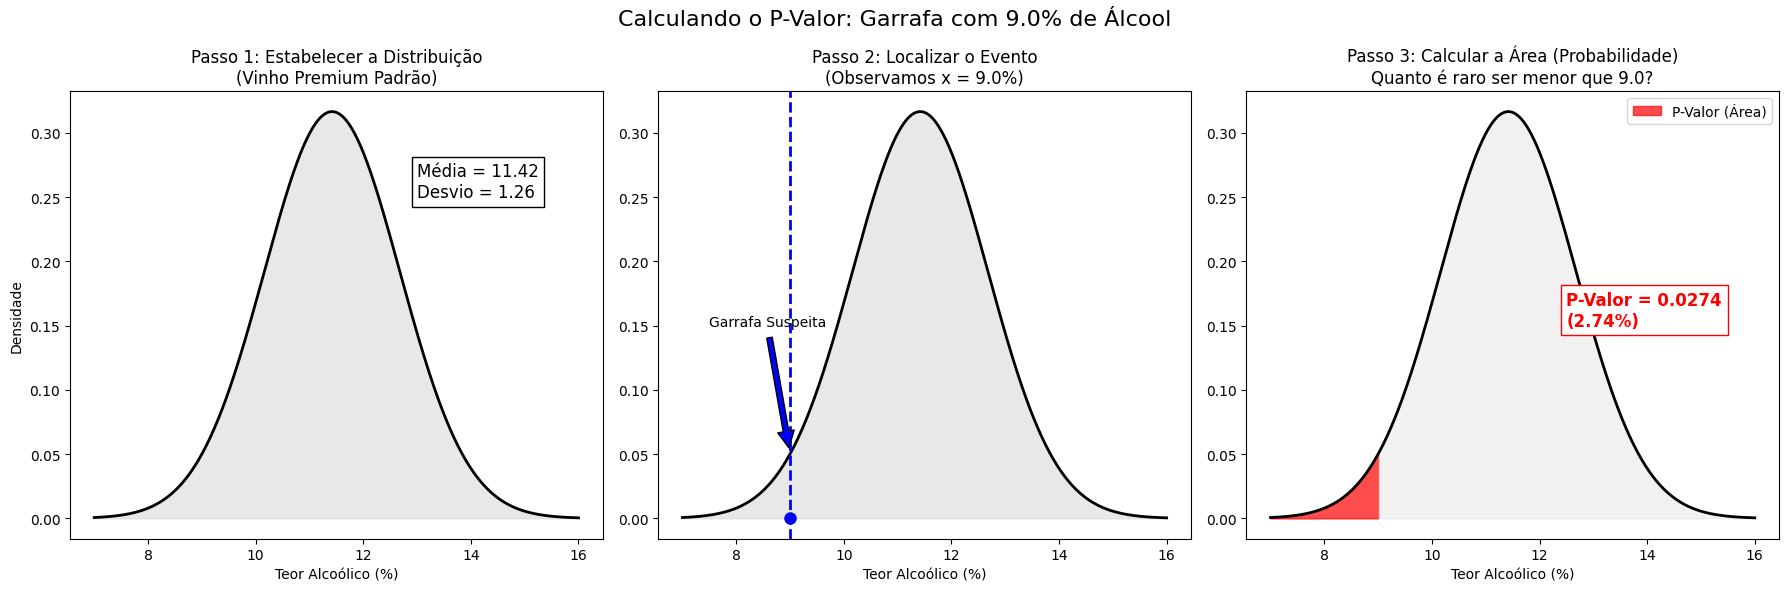

In [ ]:
x = np.linspace(7, 16, 500)
y = norm.pdf(x, real_mean, real_std)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
fig.suptitle(f'Calculando o P-Valor: Garrafa com {evento_x}% de Álcool', fontsize=16)

ax1 = axes[0]
ax1.plot(x, y, 'k-', linewidth=2)
ax1.fill_between(x, y, color='lightgray', alpha=0.5)
ax1.set_title("Passo 1: Estabelecer a Distribuição\n(Vinho Premium Padrão)")
ax1.set_xlabel('Teor Alcoólico (%)')
ax1.set_ylabel('Densidade')
ax1.text(
    13, 0.25,
    f'Média = {real_mean}\nDesvio = {real_std}',
    fontsize=12,
    bbox=dict(facecolor='white')
)

ax2 = axes[1]
ax2.plot(x, y, 'k-', linewidth=2)
ax2.fill_between(x, y, color='lightgray', alpha=0.5)
# Marcando o evento
ax2.axvline(evento_x, color='blue', linestyle='--', linewidth=2)
ax2.plot(evento_x, 0, 'bo', markersize=8)
ax2.set_title(f"Passo 2: Localizar o Evento\n(Observamos x = {evento_x}%)")
ax2.set_xlabel('Teor Alcoólico (%)')
ax2.annotate('Garrafa Suspeita', xy=(evento_x, 0.05), xytext=(7.5, 0.15),
             arrowprops=dict(facecolor='blue', shrink=0.05))

ax3 = axes[2]
ax3.plot(x, y, 'k-', linewidth=2)
# Pintando a área do p-value
x_tail = np.linspace(7, evento_x, 100)
y_tail = norm.pdf(x_tail, real_mean, real_std)
ax3.fill_between(x_tail, y_tail, color='red', alpha=0.7, label='P-Valor (Área)')
ax3.fill_between(x, y, where=(x > evento_x), color='lightgray', alpha=0.3) # Resto cinza

ax3.set_title(f"Passo 3: Calcular a Área (Probabilidade)\nQuanto é raro ser menor que {evento_x}?")
ax3.set_xlabel('Teor Alcoólico (%)')
ax3.legend()

# Exibindo o resultado calculado
resultado_texto = f"P-Valor = {p_value:.4f}\n({p_value*100:.2f}%)"
ax3.text(12.5, 0.15, resultado_texto, fontsize=12, color='red', fontweight='bold', bbox=dict(facecolor='white', edgecolor='red'))

plt.tight_layout()
plt.show()

In [19]:
print(f"--- RELATÓRIO DE DECISÃO ---")
print(f"Evento Observado: {evento_x}% de álcool")
print(f"P-Valor Calculado: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusão: REJEITAMOS H0. É muito improvável que este vinho seja Premium legítimo.")
    print("Interpretação: O evento é estatisticamente significativo (Raro).")
else:
    print("Conclusão: NÃO REJEITAMOS H0. Pode ser apenas um vinho Premium fraco.")

--- RELATÓRIO DE DECISÃO ---
Evento Observado: 9.0% de álcool
P-Valor Calculado: 0.0274
Conclusão: REJEITAMOS H0. É muito improvável que este vinho seja Premium legítimo.
Interpretação: O evento é estatisticamente significativo (Raro).


# Parte D

## P-value

**Enunciado da tarefa da parte D:** Crie duas Gaussianas como mostrado abaixo (é só variar a média). Sortei 100 sequências de três valores na azul e para cada sequência calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra é calculado p-value. Calcule a taxa de falso negativos (p-value acima de 5%).


### Configurando populações

Vinho comum - hipótese nula

In [20]:
mean_H0 = 10.3    
std_H0 = 1.26

Vinho premium - realidade h1

In [21]:
mean_H1 = 11.42   
std_H1 = 1.26

### Configurando experimento

In [ ]:
n_simulacoes = 100
n_amostra = 3  
falsos_negativos = 0
p_values_coletados = []

np.random.seed(42) 

for i in range(n_simulacoes):
    # Sorteia 3 valores da Premium
    amostra = np.random.normal(mean_H1, std_H1, n_amostra)
    media_amostra = np.mean(amostra)
    
    # Calcula o P-Value a partir da Comum
    erro_padrao = std_H0 / np.sqrt(n_amostra)
    
    # Probabilidade de ser MAIOR que a média observada (Cauda direita)
    p_val = 1 - norm.cdf(media_amostra, loc=mean_H0, scale=erro_padrao)
    p_values_coletados.append(p_val)
    
    # Verifica Falso Negativo
    # Se p-value > 0.05, o teste FALHOU em rejeitar H0 
    if p_val > 0.05:
        falsos_negativos += 1

taxa_fn = (falsos_negativos / n_simulacoes) * 100

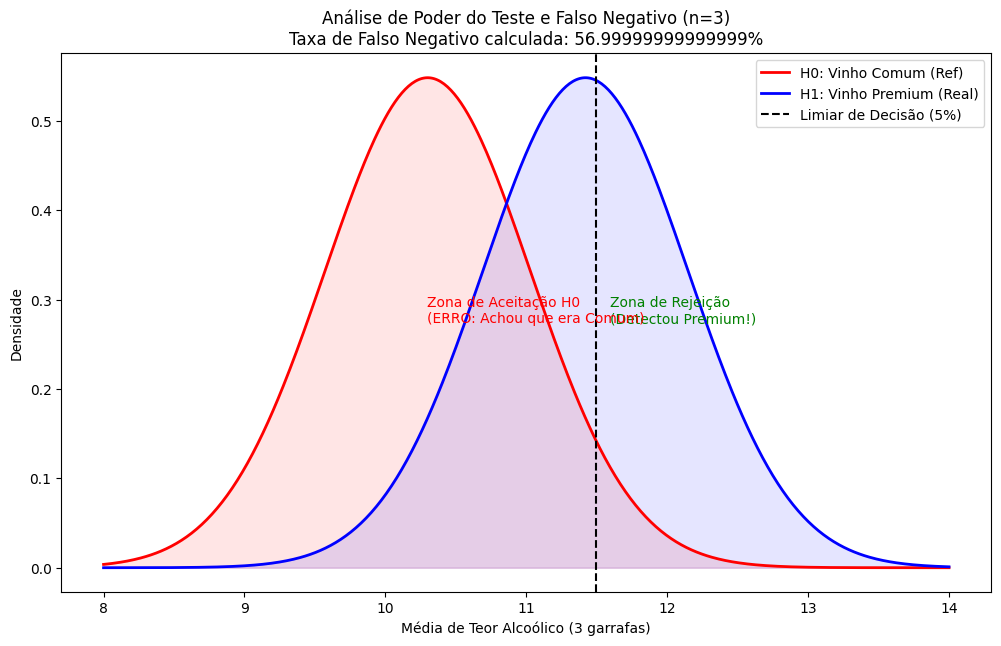

In [ ]:
plt.figure(figsize=(12, 7))

x = np.linspace(8, 14, 500)
# Curva H0 (Vermelha) - Distribuição das MÉDIAS 
y_H0 = norm.pdf(x, mean_H0, std_H0 / np.sqrt(n_amostra))
plt.plot(x, y_H0, 'r-', lw=2, label='H0: Vinho Comum (Ref)')
plt.fill_between(x, y_H0, alpha=0.1, color='red')

# Curva H1 (Azul) - Distribuição das MÉDIAS 
y_H1 = norm.pdf(x, mean_H1, std_H1 / np.sqrt(n_amostra))
plt.plot(x, y_H1, 'b-', lw=2, label='H1: Vinho Premium (Real)')
plt.fill_between(x, y_H1, alpha=0.1, color='blue')

# Linha de Corte 
limite_critico = norm.ppf(0.95, loc=mean_H0, scale=std_H0/np.sqrt(n_amostra))
plt.axvline(limite_critico, color='black', linestyle='--', label='Limiar de Decisão (5%)')

plt.title(f'Análise de Poder do Teste e Falso Negativo (n={n_amostra})\nTaxa de Falso Negativo calculada: {taxa_fn}%')
plt.xlabel('Média de Teor Alcoólico (3 garrafas)')
plt.ylabel('Densidade')
plt.legend()

plt.text(limite_critico + 0.1, max(y_H0)/2, 'Zona de Rejeição\n(Detectou Premium!)', color='green')
plt.text(limite_critico - 1.2, max(y_H0)/2, 'Zona de Aceitação H0\n(ERRO: Achou que era Comum)', color='red')

plt.show()

In [24]:
print(f"--- RESULTADO DO EXPERIMENTO ---")
print(f"Total de Simulações: {n_simulacoes}")
print(f"Vezes que o teste falhou (Falso Negativo): {falsos_negativos}")
print(f"Taxa de Falso Negativo (Erro Tipo II): {taxa_fn}%")
print(f"Poder do Teste (1 - Beta): {100 - taxa_fn}%")

--- RESULTADO DO EXPERIMENTO ---
Total de Simulações: 100
Vezes que o teste falhou (Falso Negativo): 57
Taxa de Falso Negativo (Erro Tipo II): 56.99999999999999%
Poder do Teste (1 - Beta): 43.00000000000001%
